# Customer Purchase Prediction (Social Network Ads)

**Objective:**
I wanted to see if we could predict whether a user will buy a product just by looking at their **Age** and **Salary**.
The dataset comes from social network ad campaigns.

**Method:**
I started with basic Logistic Regression but switched to a **Random Forest Classifier** because real human behavior isn't always linear. This improved the prediction accuracy significantly.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset directly from the repo
url = "https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv"
dataset = pd.read_csv(url)

# Quick check to see if data loaded right
print(f"Data Loaded: {dataset.shape[0]} rows, {dataset.shape[1]} columns")
dataset.head()

Data Loaded: 400 rows, 5 columns


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
# We only care about Age (col 2) and Salary (col 3) for the prediction
inputs = dataset.iloc[:, [2, 3]].values
targets = dataset.iloc[:, 4].values

# Splitting data: 75% for training the model, 25% for testing it
input_train, input_test, target_train, target_test = train_test_split(inputs, targets, test_size=0.25, random_state=0)

# Scaling is important because Salary (e.g. 50,000) dominates Age (e.g. 25)
# This brings them to the same range so the model treats them equally
scaler = StandardScaler()
input_train = scaler.fit_transform(input_train)
input_test = scaler.transform(input_test)

print("Data successfully split and scaled.")

Data successfully split and scaled.


In [16]:
# Using Random Forest because it handles non-linear data better than Logistic Regression
# n_estimators=100 means we are using 100 decision trees to vote on the result
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# Train the model
rf_model.fit(input_train, target_train)

print("Model training complete.")

Model training complete.


In [17]:
# Let's test the model on data it hasn't seen before
predictions = rf_model.predict(input_test)

# Calculate final accuracy
final_acc = accuracy_score(target_test, predictions)

print(f"Final Accuracy: {final_acc * 100:.2f}%")
print("-" * 30)
print("Classification Report:")
print(classification_report(target_test, predictions))

Final Accuracy: 91.00%
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



/tmp/ipython-input-4047685878.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


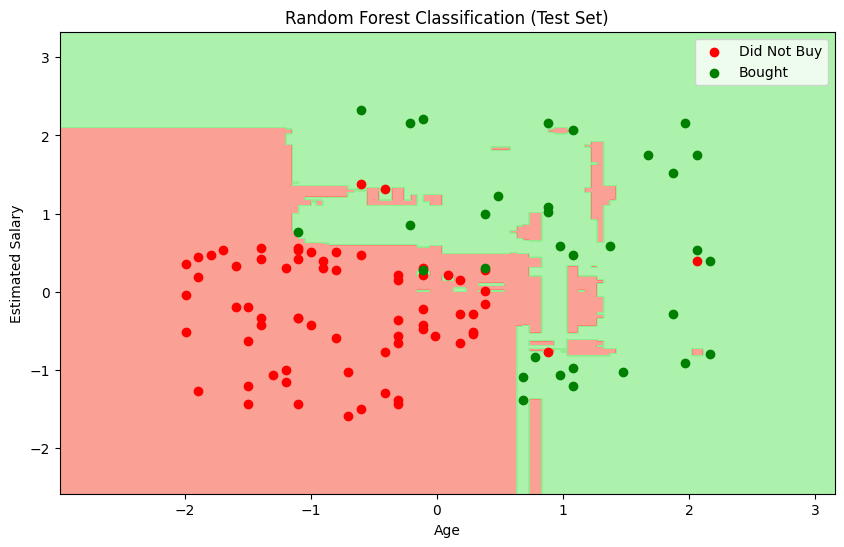

In [18]:
from matplotlib.colors import ListedColormap

# Setup the graph boundaries
X_set, y_set = input_test, target_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Plotting the decision regions
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, rf_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'lightgreen')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting the actual data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label='Bought' if j == 1 else 'Did Not Buy')

plt.title('Random Forest Classification (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [19]:
def check_potential(age, salary):
    """
    Takes a raw age and salary, scales it, and asks the model for a prediction.
    """
    # We have to scale the single input just like we did with training data
    clean_input = scaler.transform([[age, salary]])

    # Get the prediction (0 or 1)
    result = rf_model.predict(clean_input)
    confidence = rf_model.predict_proba(clean_input)[0][1] # Probability of buying

    if result[0] == 1:
        return f"✅ High Potential Customer! (Likelihood: {confidence:.1%})"
    else:
        return f"❌ Low Potential. (Likelihood: {confidence:.1%})"

# --- Testing with some custom values ---
print("Test 1 (Age 45, Salary 26k):", check_potential(45, 26000))
print("Test 2 (Age 32, Salary 150k):", check_potential(32, 150000))

Test 1 (Age 45, Salary 26k): ✅ High Potential Customer! (Likelihood: 98.0%)
Test 2 (Age 32, Salary 150k): ✅ High Potential Customer! (Likelihood: 100.0%)
